<a href="https://colab.research.google.com/github/engrvitalis/NAU/blob/main/ANN_ELM_Welding_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import relevant packages.

In [12]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 150)

Initialize relevant functions.

In [25]:
def format_table(name, drop_column, columns):
  df = pd.read_csv(name)
  df = pd.get_dummies(df).drop(drop_column, axis=1)
  df = df[columns]
  
  return df

In [24]:
def generate_train_test(df, n_cols):
  X = df.iloc[:, :n_cols].to_numpy()
  y = df.iloc[:, -4:].to_numpy()

  return train_test_split(X, y,random_state=1, test_size=0.2)

In [14]:
def explore(df):
  pos = 1
  for i in range(4):
    print(f'\t{df.columns[i].capitalize()} vs Response values')
    plt.figure(figsize=[10, 5])
    for j in range(8, 12):
      plt.subplot(1, 4, pos)
      plt.scatter(df.iloc[:, i], df.iloc[:, j])
      plt.ylabel(df.columns[j])
      plt.xlabel(df.columns[i])
      pos += 1
    plt.tight_layout()
    plt.show()
    print('\n')
    pos = 1

In [28]:
def ann_analysis():
  sc_X = StandardScaler()
  X_trainscaled=sc_X.fit_transform(X_train)
  X_testscaled=sc_X.transform(X_test)

  reg = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation='relu', random_state=1, max_iter=5000).fit(X_trainscaled, y_train)

  y_ann_pred=reg.predict(X_testscaled)
  ann_r2 = r2_score(y_ann_pred, y_test)
  ann_rmse = np.sqrt(mean_squared_error(y_test, y_ann_pred))
  ann_mae = mean_absolute_error(y_test, y_ann_pred)

  return reg, ann_r2, ann_rmse, ann_mae, y_ann_pred

In [29]:
def elm_analysis(hidden_size=5000):
  input_size = X_train.shape[1]
  hidden_size = hidden_size
  input_weights = np.random.normal(size=[input_size,hidden_size])
  biases = np.random.normal(size=[hidden_size])

  def relu(x):
    return np.maximum(x, 0, x)

  def hidden_nodes(X):
      G = np.dot(X, input_weights)
      G = G + biases
      H = relu(G)
      return H

  output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)

  def predict(X):
      out = hidden_nodes(X)
      out = np.dot(out, output_weights)
      return out

  y_elm_pred = predict(X_test)
  elm_r2 = r2_score(y_test, y_elm_pred)
  elm_rmse = np.sqrt(mean_squared_error(y_test, y_elm_pred))
  elm_mae = mean_absolute_error(y_test, y_elm_pred)

  return elm_r2, elm_rmse, elm_mae, y_elm_pred

In [30]:
def disp_matrics(r2, rmse, mae, title):
  print(title)
  print('===============================================')
  print(f'R^2:\t{r2}')
  print(f'rmse:\t{rmse}')
  print(f'mae:\t{mae}')
  print('\n')

In [19]:
def disp_graphs():
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(y_ann_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ANN')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.subplot(1, 2, 2)
  plt.scatter(y_elm_pred, y_test)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
  plt.title('ELM')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  plt.suptitle('Comparing Models Predictive Abilities', x=.506, y=1.03, fontsize=16)

  plt.tight_layout()

  plt.show()

In [20]:
def disp_compare_graphs():
  plt.figure(figsize = (10, 5))

  x = np.arange(3)
  ann = [ann_r2*100, ann_rmse, ann_mae]
  elm = [elm_r2*100, elm_rmse, elm_mae]
  width = 0.40
    
  # plot data in grouped manner of bar type
  plt.bar(x-0.2, ann, width, color='green')
  plt.bar(x+0.2, elm, width, color='red')
  plt.xticks(x, ['R^2', 'RMSE', 'MAE'])
  plt.title("Comparing metrics for ANN and ELM")
  plt.xlabel("Metrics")
  plt.ylabel("Values")
  plt.legend(["ANN", "ELM"])
  plt.show()

In [21]:
# Initialize variables and return a dataframe formatted as per specification.
name = '/content/drive/MyDrive/Analysis jobs/Achike/Data/welding_data_by_properties.csv'
drop_column = 'property_flexural_strength'
columns = ['current',	'voltage',	'welding_speed',	'plate_thickness',	'property_hardness',
            'property_heat_input',	'property_residual_stress',	'property_tensile_strength',
           'saw',	'smaw',	'gmaw',	'gtaw']
df = format_table(name, drop_column, columns)

# Explore available data.
df.head()

,current,voltage,welding_speed,plate_thickness,property_hardness,property_heat_input,property_residual_stress,property_tensile_strength,saw,smaw,gmaw,gtaw
0,100,24,90,6,0,1,0,0,1600.0,1280.0,1280.0,960.0
1,100,28,120,8,0,1,0,0,1400.0,1120.0,1120.0,840.0
2,100,32,150,10,0,1,0,0,1280.0,1024.0,1024.0,768.0
3,130,24,120,10,0,1,0,0,1560.0,1248.0,1248.0,936.0
4,130,28,150,6,0,1,0,0,1456.0,1165.0,1165.0,874.0


MODEL MATRICS.



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The ANN model performance for testing set
R^2:	0.9645866112223535
rmse:	80.72969178440474
mae:	64.74600109874886


The ELM model performance for testing set
R^2:	0.987935015837877
rmse:	35.78448874955133
mae:	26.30124750872706


  Score        ELM        ANN
0   R^2   0.987935   0.964587
1  rmse  35.784489  80.729692
2   mae  26.301248  64.746001 




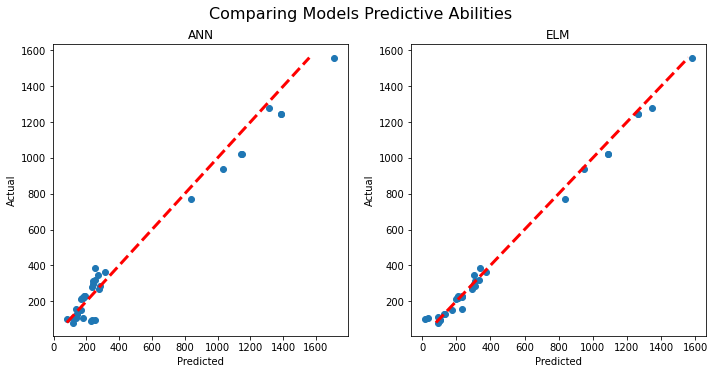

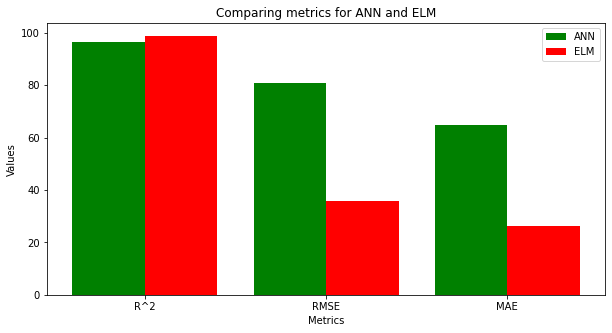

In [22]:
# display(df.describe())
# print('')
# explore(df)

# Build models, train and predict.
print('MODEL MATRICS.')
print('===============================================')
print('')
reg, ann_r2, ann_rmse, ann_mae, X_train, y_train, X_test, y_test, y_ann_pred = ann_analysis(df, 8)
elm_r2, elm_rmse, elm_mae, X_train, y_train, X_test, y_test, y_elm_pred = elm_analysis()

# Initialize variables.
ann_params = ['The ANN model performance for testing set', ann_r2, ann_rmse, ann_mae]
elm_params = ['The ELM model performance for testing set', elm_r2, elm_rmse, elm_mae]

# Display metrics.
for param in [ann_params, elm_params]:
  disp_matrics(param[1], param[2], param[3], param[0])

data = [['R^2', elm_r2, ann_r2], 
        ['rmse', elm_rmse, ann_rmse], 
        ['mae', elm_mae, ann_mae]]
metric_table = pd.DataFrame(data, columns=['Score', 'ELM', 'ANN'])
print(metric_table, '\n\n')

# Display graphics.
disp_graphs()

disp_compare_graphs()